## <center>Методи та технології аналітики даних</center>
## <center>Лабораторна робота №7</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
file_name = r'..\Dataset\adult_cleaned.data'
headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status',
           'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
           'Hours_per_week', 'Native_country', 'Income']
df = pd.read_csv(file_name, sep=",", header=1, names=headers, na_values='?')
df

,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
2,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
3,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
4,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30155,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30156,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30157,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Прибираємо викиди, щоб на графіках не було зайвих точок

In [18]:
attributes_box_violin = ['Age', 'Hours_per_week']
attributes_contour = ['Education_num', 'Hours_per_week']
df_cleaned = df.copy()

for col in attributes_box_violin:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("Розмір очищеного набору даних:", df_cleaned.shape)

Розмір очищеного набору даних: (22141, 15)


Коробчаста діаграма

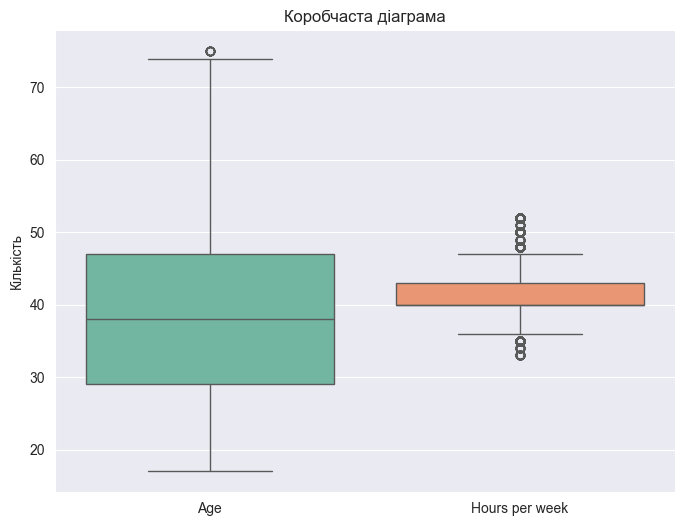

In [19]:
palette = sns.color_palette("Set2")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned[attributes_box_violin], palette=palette[:2])
plt.title("Коробчаста діаграма")
plt.ylabel("Кількість")
plt.xticks(range(len(attributes_box_violin)), ['Age', 'Hours per week'])
plt.show()

Скрипковий графік

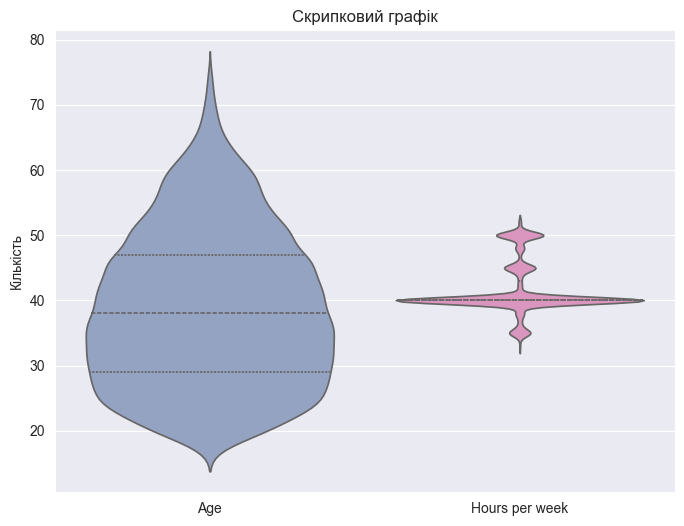

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_cleaned[attributes_box_violin], density_norm="count", inner="quart", palette=palette[2:4])
plt.title("Скрипковий графік")
plt.ylabel("Кількість")
plt.xticks(range(len(attributes_box_violin)), ['Age', 'Hours per week'])
plt.show()

Гістограма

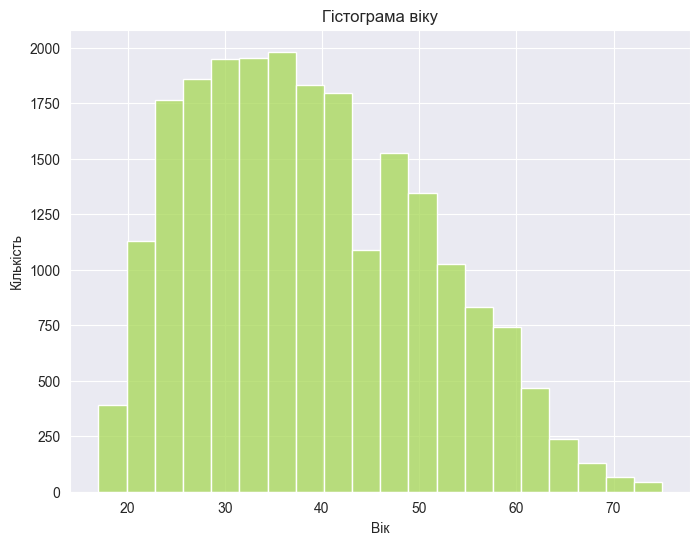

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=False, bins=20, color=palette[4])
plt.title("Гістограма віку")
plt.xlabel("Вік")
plt.ylabel("Кількість")
plt.show()

Графік густини

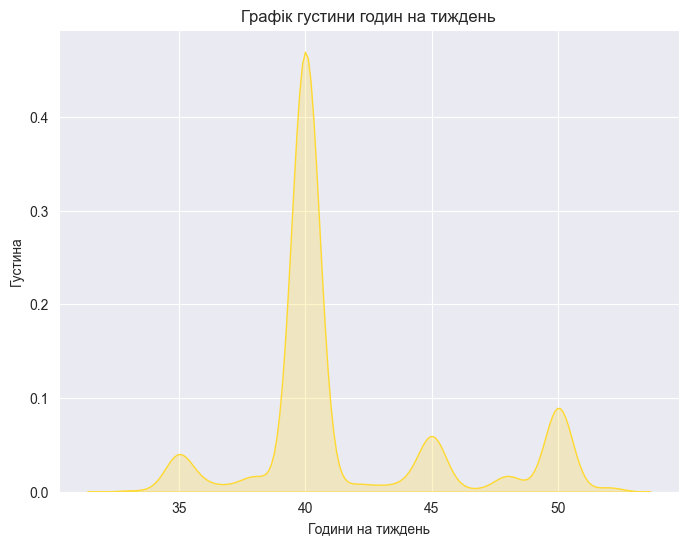

In [22]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_cleaned['Hours_per_week'], color=palette[5], fill=True)
plt.title("Графік густини годин на тиждень")
plt.xlabel("Години на тиждень")
plt.ylabel("Густина")
plt.show()

Контурний графік

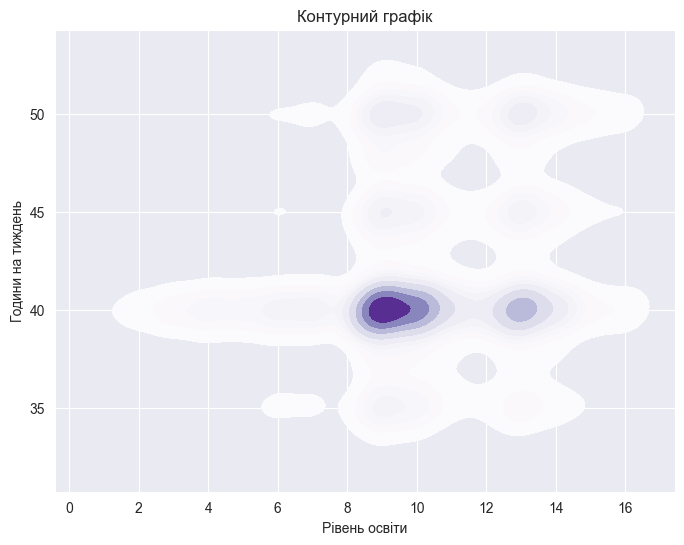

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_cleaned['Education_num'], y=df_cleaned['Hours_per_week'], cmap="Purples", fill=True)
plt.title("Контурний графік")
plt.xlabel("Рівень освіти")
plt.ylabel("Години на тиждень")
plt.show()

побудувати коефіцієнти кореляцій для 2
атрибутів. побудувати кореляційну матицю.

In [24]:
correlation = df_cleaned[attributes_contour].corr(method='pearson')
print("Коефіцієнт кореляції Пірсона між 'Age' і 'Hours_per_week':")
print(correlation)

Коефіцієнт кореляції Пірсона між 'Age' і 'Hours_per_week':
                Education_num  Hours_per_week
Education_num        1.000000        0.141498
Hours_per_week       0.141498        1.000000


Кореляційна матриця

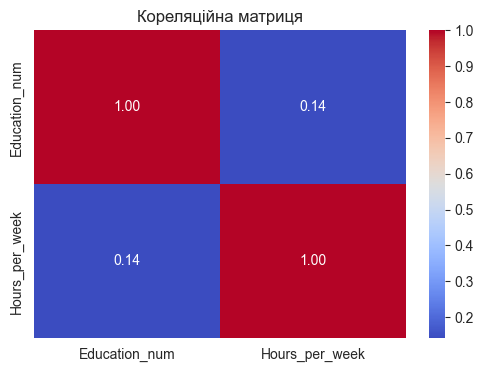

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

- розрахувати моду та стандартну похибку.

In [26]:
for col in attributes_contour:
    mode_value = df_cleaned[col].mode().iloc[0]
    print(f"Мода для '{col}': {mode_value}")

Мода для 'Education_num': 9
Мода для 'Hours_per_week': 40


Стандартна похибка (SE) обчислюється за формулою:

$SE = \frac{\sigma}{\sqrt{n}}$


In [27]:
for col in attributes_contour:
    std_dev = df_cleaned[col].std()
    n = len(df_cleaned[col])
    std_error = std_dev / np.sqrt(n)
    print(f"Стандартна похибка для '{col}': {std_error:.4f}")

Стандартна похибка для 'Education_num': 0.0169
Стандартна похибка для 'Hours_per_week': 0.0271


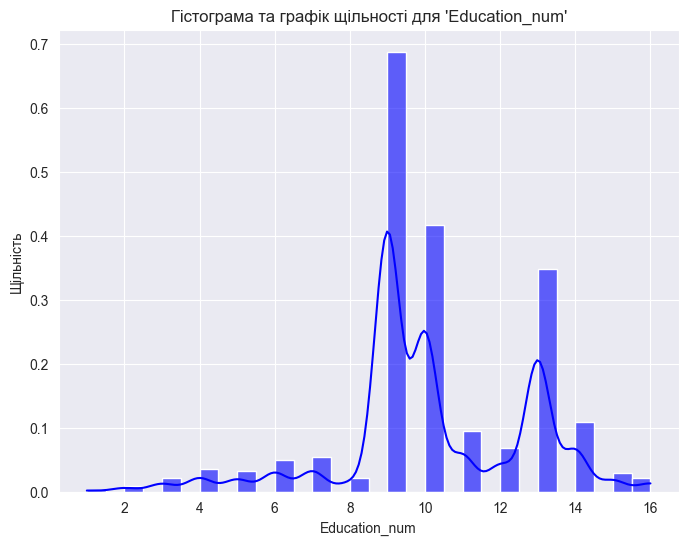

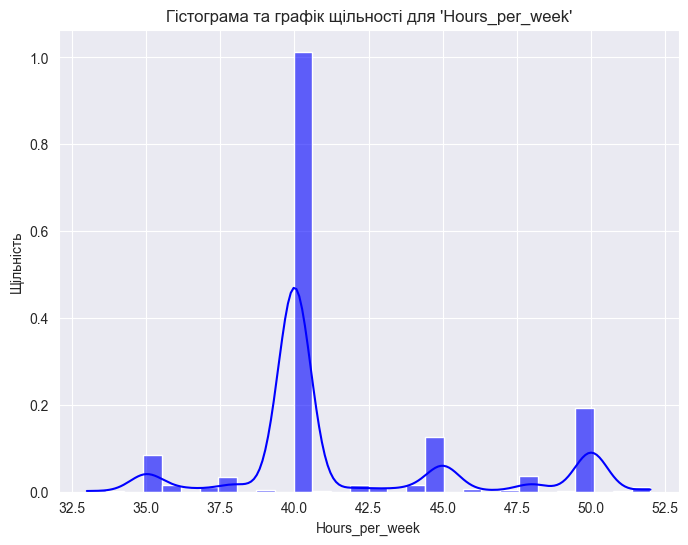

In [28]:
for col in attributes_contour:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True, bins=30, stat="density", color="blue", alpha=0.6)
    plt.title(f"Гістограма та графік щільності для '{col}'")
    plt.xlabel(col)
    plt.ylabel("Щільність")
    plt.show()

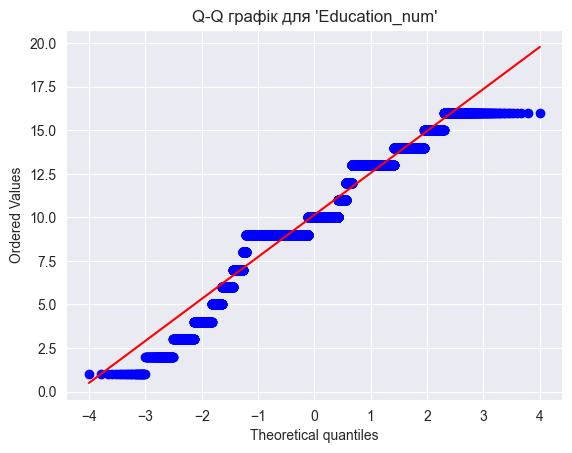

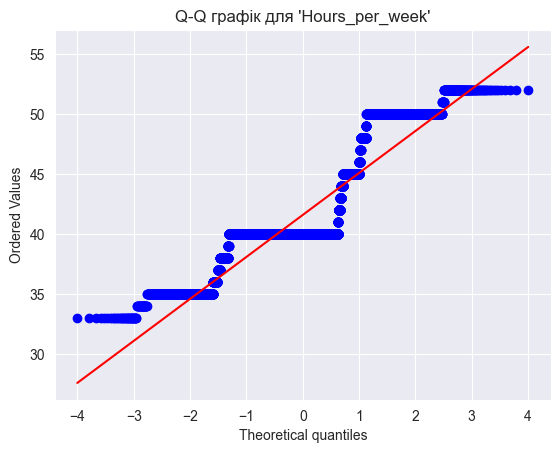

In [29]:
for col in ['Education_num', 'Hours_per_week']:
    stats.probplot(df_cleaned[col], dist="norm", plot=plt)
    plt.title(f"Q-Q графік для '{col}'")
    plt.show()

Бутстрап вибірка, та обчислення довірчого інтервалу

Довірчий інтервал для середнього значення 'Hours_per_week': (41.57, 41.68)


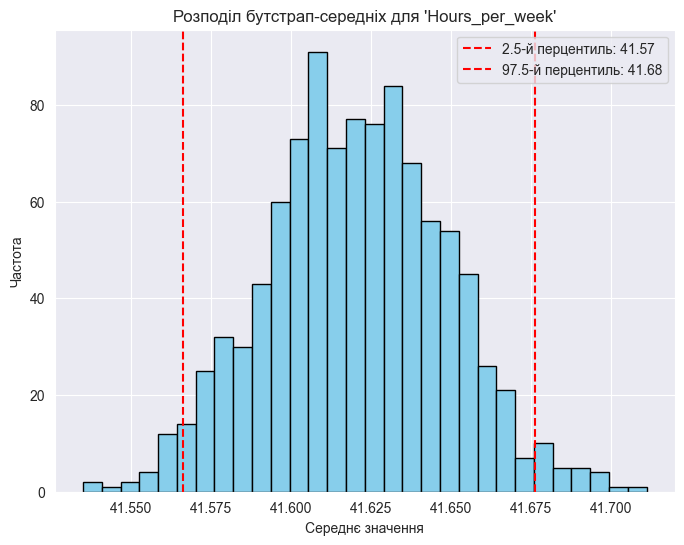

In [30]:
data = df_cleaned['Hours_per_week']
n_bootstrap = 1000

bootstrap_means = []
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))

lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"Довірчий інтервал для середнього значення 'Hours_per_week': ({lower_bound:.2f}, {upper_bound:.2f})")

plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'2.5-й перцентиль: {lower_bound:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'97.5-й перцентиль: {upper_bound:.2f}')
plt.title("Розподіл бутстрап-середніх для 'Hours_per_week'")
plt.xlabel("Середнє значення")
plt.ylabel("Частота")
plt.legend()
plt.show()